# Sheet 5
## Exercise 3 - Polynomial SRM
### a) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from random import sample
from sklearn.model_selection import train_test_split

In [2]:
# load data
data = np.loadtxt("data.txt")
x = np.expand_dims(data[0],  axis=-1)
y = data[1]

# increase figure size
plt.rcParams['figure.figsize'] = [15, 7]
# set colors for different polynomials
colors = ['g', 'r', 'c', 'm', 'y', 'tab:orange', 'tab:purple', 'tab:brown', 'k', 'tab:grey', 'tab:pink']

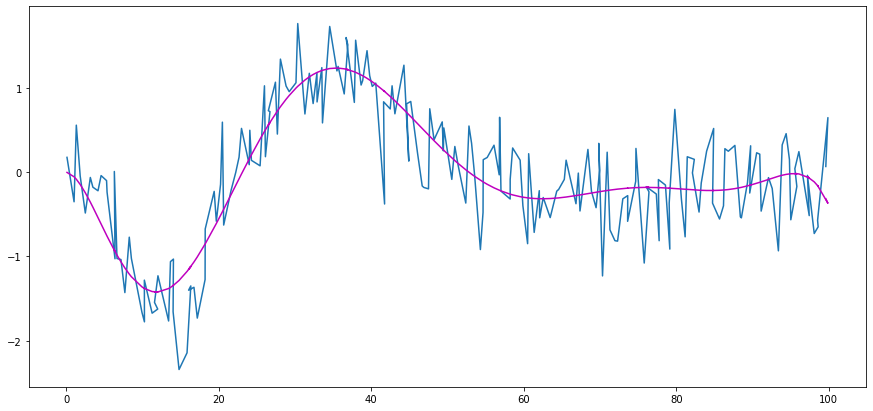

In [3]:
def fit_timeseries():
    # fit polynomial of order 8 using OLS
    polynomial_features= PolynomialFeatures(degree=8)
    x_poly = polynomial_features.fit_transform(x)
    model = OLS(y, x_poly)
    results = model.fit()
    params = results.params
    # predict values
    new_y = model.predict(params, exog=x_poly)
    # plot fit
    plt.plot(x, new_y, color='m')

plt.plot(data[0], data[1])
fit_timeseries()

### b) training error as function of polynomial order

0.6148139426152095
0.6117965602327231
0.5151128357382438
0.46205458972112295
0.41286987995369645
0.22711636164776092
0.199276671952521
0.1902555979224605
0.16983945242312573
0.45131922574687455
0.43879735538519155


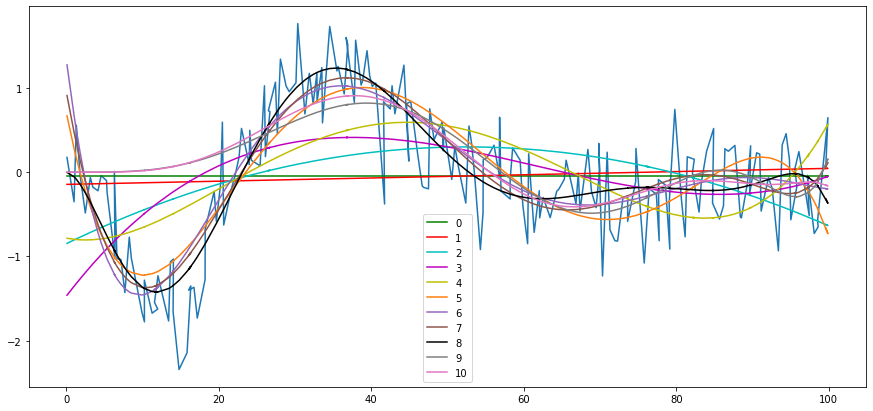

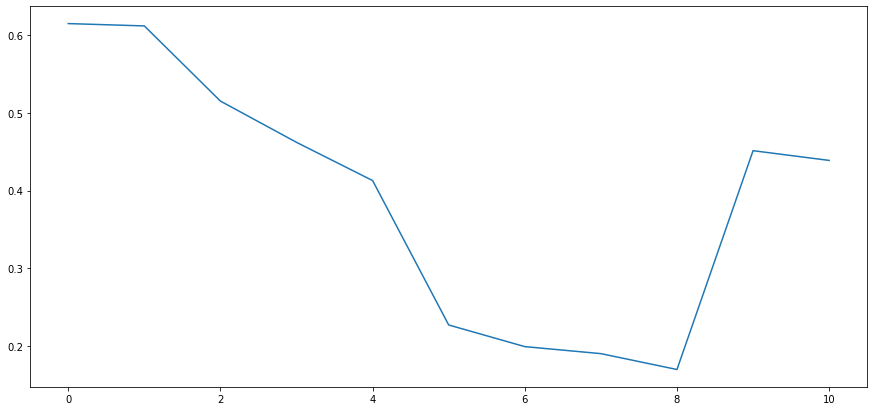

In [4]:
def fit_timeseries_and_l2():
    # save errors
    ms_errors = []
    
    # iterate through differnet orders
    for order in range(11):
        # fit polynomial using OLS
        polynomial_features = PolynomialFeatures(degree=order)
        x_poly = polynomial_features.fit_transform(x)
        model = OLS(y, x_poly)
        results = model.fit()
        params = results.params
        # predict
        new_y = model.predict(params, exog=x_poly)
        # compute and save L2 loss/ MSE
        mse = mean_squared_error(y, new_y)
        ms_errors.append(mse)
        
        # plot different functions
        plt.plot(x, new_y, label=order, color=colors[order])
        plt.legend()
        print(mse)
    
    # plot l2 loss as a function of order
    plt.figure()
    plt.plot(range(11), ms_errors)

plt.plot(data[0], data[1])
fit_timeseries_and_l2()

### c) 100 random downsamples containing fraction f of the data

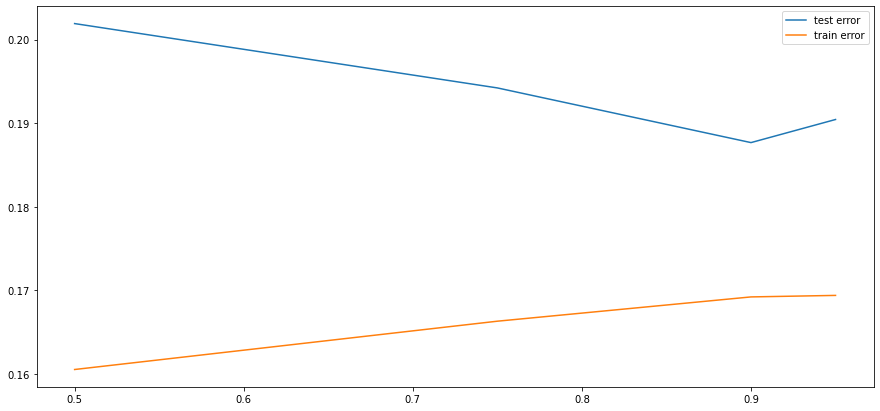

In [5]:
f = [0.5, 0.75, 0.9, 0.95]

def fit_timeseries_subsamples():
    # save errors
    mean_test_errors = []
    mean_train_errors = []
    
    # iterate over fractions
    for fraction in f:
        test_errors = []
        train_errors = []
        # compute 100 downsamples
        for i in range(100):
            
            # split in tarin and test sets
            X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=fraction, random_state=i)
            
            # fit polynomial of order 8 using OLS
            polynomial_features = PolynomialFeatures(degree=8)
            x_train_poly = polynomial_features.fit_transform(X_train)
            x_test_poly = polynomial_features.fit_transform(X_test)
            model = OLS(y_train, x_train_poly)
            results = model.fit()
            params = results.params
            
            # compute train error
            new_y_train = model.predict(params, exog=x_train_poly)
            mse_train = mean_squared_error(y_train, new_y_train)
            train_errors.append(mse_train)
            
            # compute test error
            new_y_test = model.predict(params, exog=x_test_poly)
            mse_test = mean_squared_error(y_test, new_y_test)
            test_errors.append(mse_test)
         
        mean_test_errors.append(np.mean(test_errors))
        mean_train_errors.append(np.mean(train_errors))
        
    # plot errors
    plt.plot(f, mean_test_errors, label="test error")
    plt.plot(f, mean_train_errors, label="train error")
    plt.legend()

    
fit_timeseries_subsamples()

### d) optimal model complexity

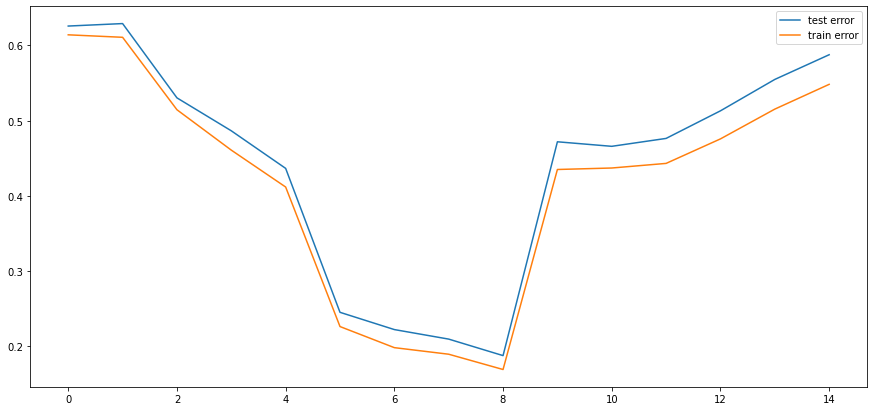

In [6]:
fraction = 0.9

def fit_timeseries_subsamples():
    # save errors
    mean_test_errors = []
    mean_train_errors = []
    
    # iterate over fractions
    for degree in range(15):
        test_errors = []
        train_errors = []
        # compute 100 downsamples
        for i in range(100):
            
            # split in tarin and test sets
            X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=fraction, random_state=i)
            
            # fit polynomial of order 8 using OLS
            polynomial_features = PolynomialFeatures(degree=degree)
            x_train_poly = polynomial_features.fit_transform(X_train)
            x_test_poly = polynomial_features.fit_transform(X_test)
            model = OLS(y_train, x_train_poly)
            results = model.fit()
            params = results.params
            
            # compute train error
            new_y_train = model.predict(params, exog=x_train_poly)
            mse_train = mean_squared_error(y_train, new_y_train)
            train_errors.append(mse_train)
            
            # compute test error
            new_y_test = model.predict(params, exog=x_test_poly)
            mse_test = mean_squared_error(y_test, new_y_test)
            test_errors.append(mse_test)
         
        mean_test_errors.append(np.mean(test_errors))
        mean_train_errors.append(np.mean(train_errors))
        
    # plot errors
    plt.plot(range(15), mean_test_errors, label="test error")
    plt.plot(range(15), mean_train_errors, label="train error")
    plt.legend()

    
fit_timeseries_subsamples()